<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Netflix Titles 2021</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Data Set</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<a id='import-library'></a>
# <font color='darkred'> <b>Importing Libraries</b><font color='black'> 

In [1]:
 ! pip install summarytools

In [2]:
!pip install wordcloud


In [3]:
!pip install skimpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: polars
    Found existing installation: polars 1.5.0
    Uninstalling polars-1.5.0:
      Successfully uninstalled polars-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompa

In [4]:
!pip install cufflinks


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os

from wordcloud import WordCloud, ImageColorGenerator # word cloud library
from PIL import Image

from skimpy import skim

from summarytools import dfSummary

import cufflinks as cf # is a library that can work with the pandas library.
cf.go_offline() # we make graphics offline

# Text preprocessing for analyzing the most frequently used words (in the 'title' column).
from collections import Counter
import string

import folium
from folium import plugins

# warnings
import warnings
warnings.filterwarnings("ignore") # we use it to not see trivial warnings in the code lines.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='darkred'> <b>Loading The Data Set</b><font color='black'> 

In [3]:
df0 = pd.read_csv("netflix_titles_2021.csv")
df = df0.copy()

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<a id='understanding-dataset'></a>
# <font color='darkred'> <b>Understanding The Dataset</b><font color='black'> 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.shape

(8807, 12)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [12]:
df.describe(include= "object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

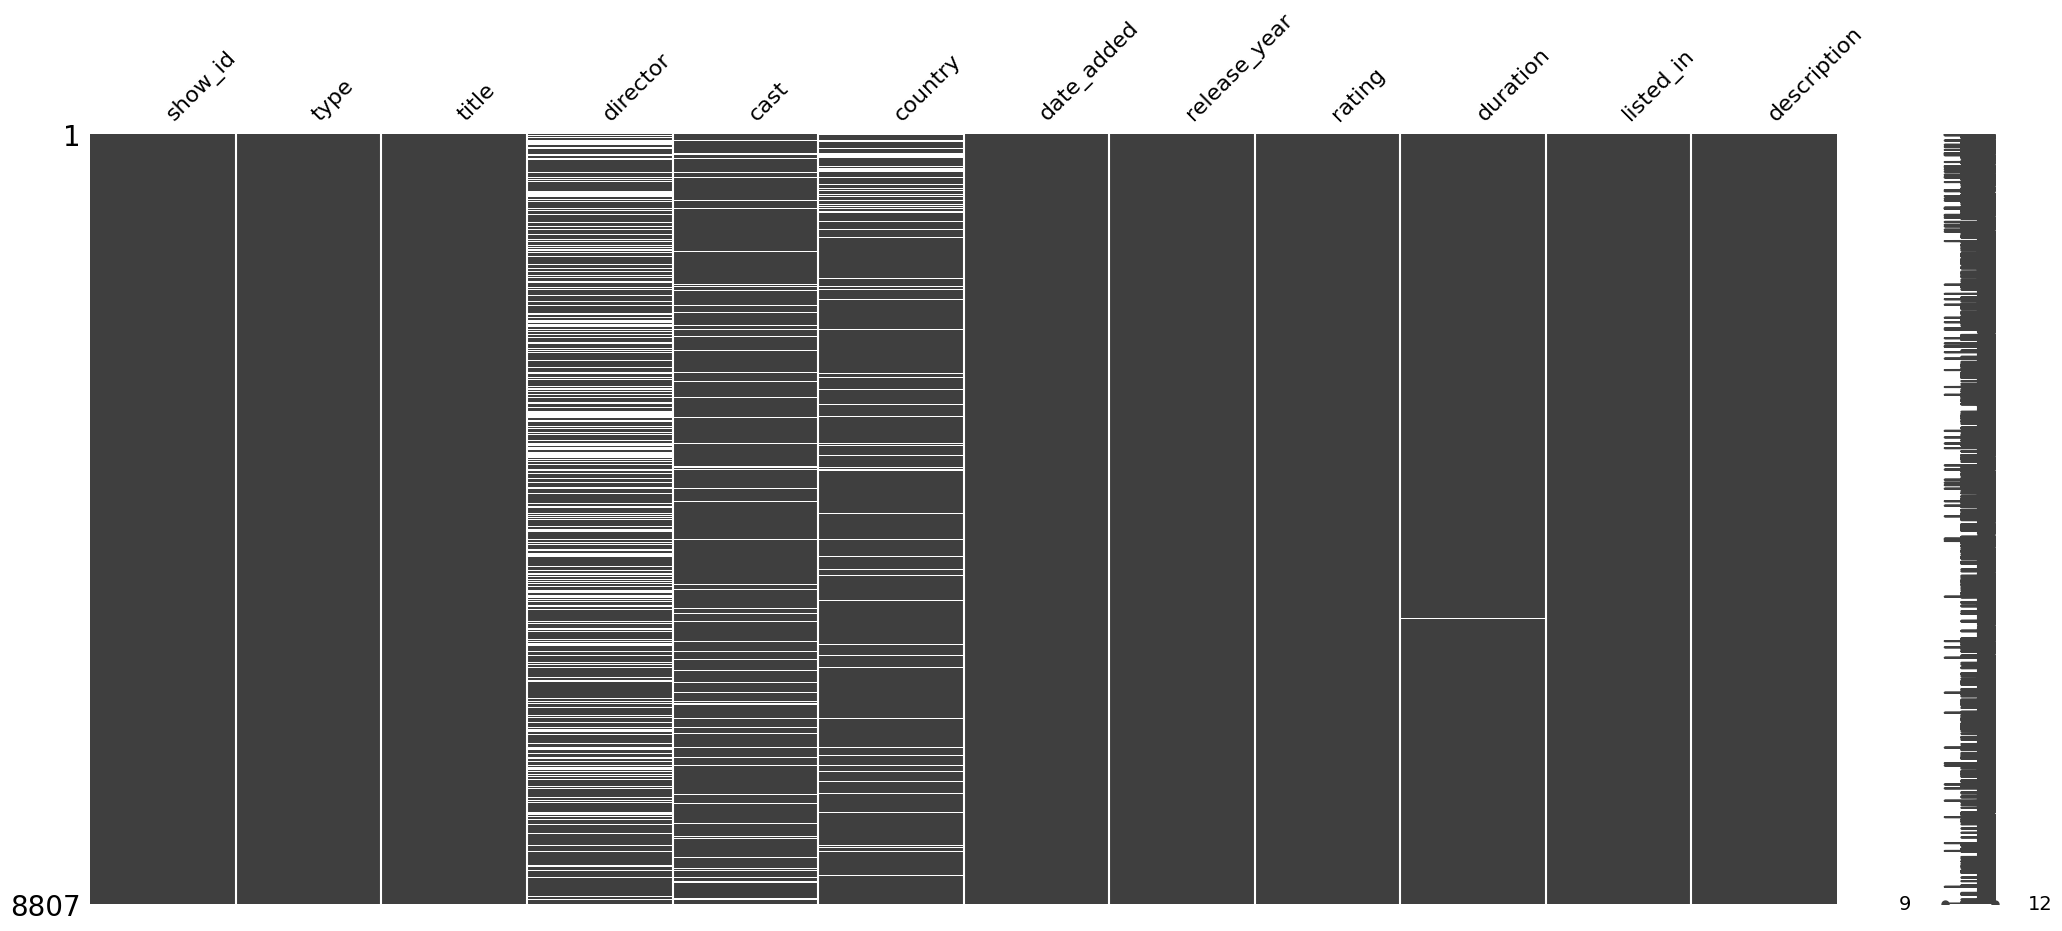

In [14]:
msno.matrix(df);

In [15]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [16]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [17]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8782,s8783,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",2016,PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...
4478,s4479,TV Show,DreamWorks Spooky Stories,NaN,"Antonio Banderas, Hugh Laurie, Mike Myers, Ree...",United States,"October 25, 2018",2009,TV-PG,1 Season,"Kids' TV, TV Comedies",Shrek dares his friends to bring on the scary ...
6840,s6841,Movie,Get Santa,Christopher Smith,"Jodie Whittaker, Warwick Davis, Jim Broadbent,...","United Kingdom, United States","December 12, 2014",2014,PG,103 min,"Children & Family Movies, Comedies",When Santa gets arrested for trespassing after...
5254,s5255,TV Show,Mak Cun,NaN,"Erma Fatima, Rahim Razali, Umie Aida, Nora Danish",NaN,"September 29, 2017",2015,TV-PG,1 Season,"International TV Shows, TV Comedies, TV Dramas",A woman with an entrepreneurial spirit takes l...
6699,s6700,Movie,Enlighten Us,Jenny Carchman,James Arthur Ray,United States,"January 18, 2017",2016,TV-14,93 min,Documentaries,This documentary digs deep to recount the saga...


<a id='organizing-columns'></a>
# <font color='darkred'> <b>Organizing Columns</b><font color='black'> 

In [18]:
# remove spaces from columns
df["type"] = df["type"].str.strip()
df["title"] = df["title"].str.strip()
df["director"] = df["director"].str.strip()
df["cast"] = df["cast"].str.strip()
df["country"] = df["country"].str.strip()
df["date_added"] = df["date_added"].str.strip()
df["rating"] = df["rating"].str.strip()
df["duration"] = df["duration"].str.strip()
df["listed_in"] = df["listed_in"].str.strip()

## <font color='indianred'> <b>data_added Column</b><font color='black'> 

In [19]:
# turning the dtype of data_added column into datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

## <font color='indianred'> <b>rating Column</b><font color='black'> 

In [20]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [21]:
# remove '74 min', '84 min', '66 min' values
df = df[~df['rating'].str.contains('min', na=False)]

In [22]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

## <font color='indianred'> <b>description Column</b><font color='black'> 

In [23]:
df = df.drop(columns=['description'])

In [24]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2790,s2791,TV Show,Greenhouse Academy,NaN,"Ariel Mortman, Finn Roberts, Chris O'Neal, Dal...",United States,2020-03-20,2020,TV-PG,4 Seasons,"Kids' TV, TV Dramas, Teen TV Shows"
3202,s3203,Movie,Wandering Stars,"Syrine Boulanouar, Nekfeu",Nekfeu,France,2019-12-01,2019,TV-MA,95 min,"Documentaries, International Movies, Music & M..."
6247,s6248,Movie,BASEketball,David Zucker,"Trey Parker, Matt Stone, Dian Bachar, Yasmine ...",United States,2018-11-01,1998,R,103 min,"Comedies, Sports Movies"
7110,s7111,Movie,Jack and the Cuckoo-Clock Heart,"Mathias Malzieu, Stéphane Berla","Orlando Seale, Samantha Barks, Harry Sadeghi, ...","France, Belgium",2017-02-08,2013,PG,93 min,"Children & Family Movies, Music & Musicals"
5031,s5032,Movie,Forgotten,Hang-Jun Jang,"Ha-neul Kang, Moo-Yul Kim, Young-hee Na, Seong...",South Korea,2018-02-21,2017,TV-MA,109 min,"Dramas, International Movies, Thrillers"


<a id='nan-values'></a>
# <font color='darkred'> <b>NaN Values</b><font color='black'> 

In [25]:
df['director'] = df['director'].fillna('Unknown') # Missing (NaN) values in the 'director' column were filled with 'Unknown'.

In [26]:
df['cast'] = df['cast'].fillna('Unknown') # Missing (NaN) values in the 'cast' column were filled with 'Unknown'.

In [27]:
df['country'] = df['country'].fillna('Unknown') # Missing (NaN) values in the 'country' column were filled with 'Unknown'.

In [28]:
df['date_added'] = df['date_added'].fillna('Unknown') # Missing (NaN) values in the 'date_added' column were filled with 'Unknown'.

In [29]:
df['rating'] = df['rating'].fillna('Unknown') # Missing (NaN) values in the 'rating' column were filled with 'Unknown'.

In [30]:
df['duration'] = df['duration'].fillna('Unknown') # Missing (NaN) values in the 'duration' column were filled with 'Unknown'.

<a id='data-visualization'></a>
# <font color='darkred'> <b>Data Visualization</b><font color='black'> 

## <font color='indianred'> <b>Distribution of Movies and TV Shows</b><font color='black'> 

In [31]:
df.type.value_counts()

type
Movie      6128
TV Show    2676
Name: count, dtype: int64

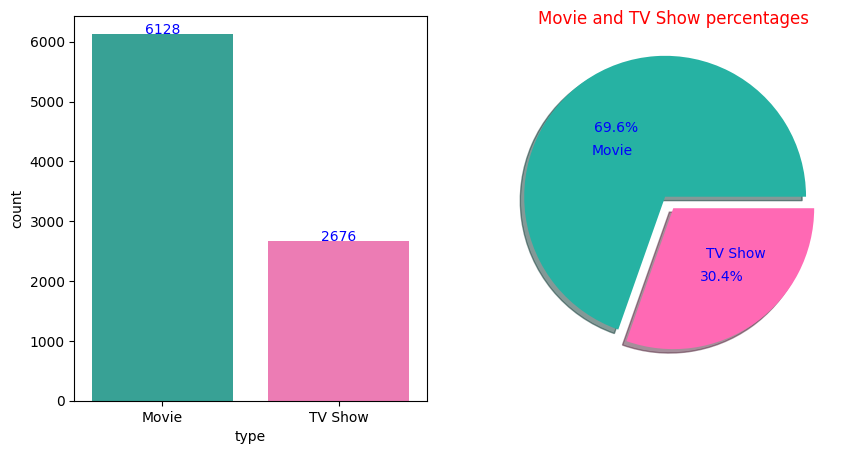

In [32]:
color_list = ["#26b2a3", "hotpink"]
explode_list = [0.1, 0]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(data = df, x = "type", ax = ax[0], palette = color_list)
plt.pie(df.type.value_counts(), labels = df.type.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors= color_list, explode = explode_list, textprops={'color': 'blue'})

plt.title('Movie and TV Show percentages', color = 'red')

for p in ax[0].patches:
    # Get the height of the bar and the x position
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2  # Center the text horizontally
    # Annotate with white color
    ax[0].annotate(
        f"{int(height)}",
        (x, height + 1),  # Position the text slightly above the bar
        ha='center',  # Horizontal alignment
        color='blue',  # Text color
        fontsize=10  # Optional: set the font size
    )
    
plt.show()

## <font color='indianred'> <b>Distribution of Movies and TV Shows by Years</b><font color='black'> 

In [33]:
# Splitting the date column into day, month, and year
# Date Example: 'January 8, 2018' 
# Matching format = `format="%B %d, %Y`

df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce') 

df['year'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month'] = df['date_added'].dt.month.fillna(0).astype(int)
df['day'] = df['date_added'].dt.day.fillna(0).astype(int)

df_grouped = df[df.year > 0].groupby(['year', 'type']).size().reset_index(name='count').sort_values("year")
df_grouped

,year,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


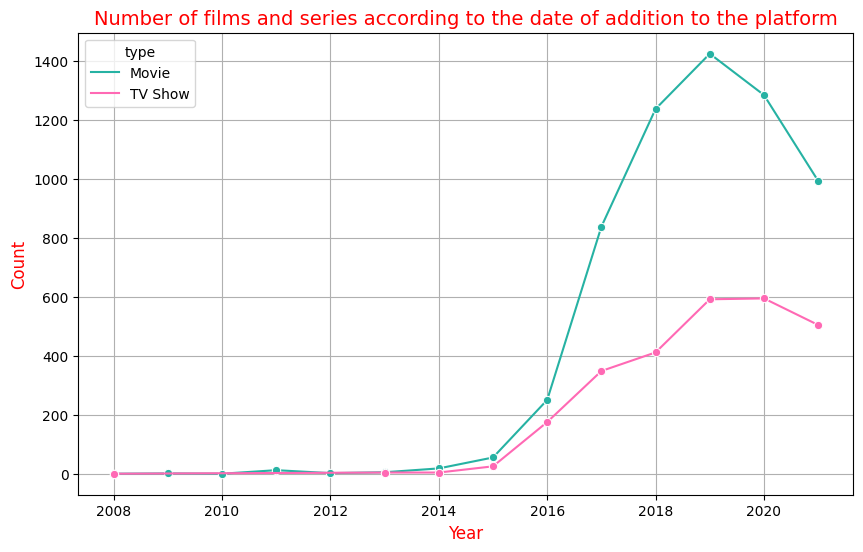

In [34]:
color_list = ["#26b2a3", "hotpink"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Number of films and series according to the date of addition to the platform', color= 'red',fontsize=14)
plt.xlabel('Year', color= 'red', fontsize=12)
plt.ylabel('Count', color= 'red', fontsize=12)
plt.grid(True)
plt.show()

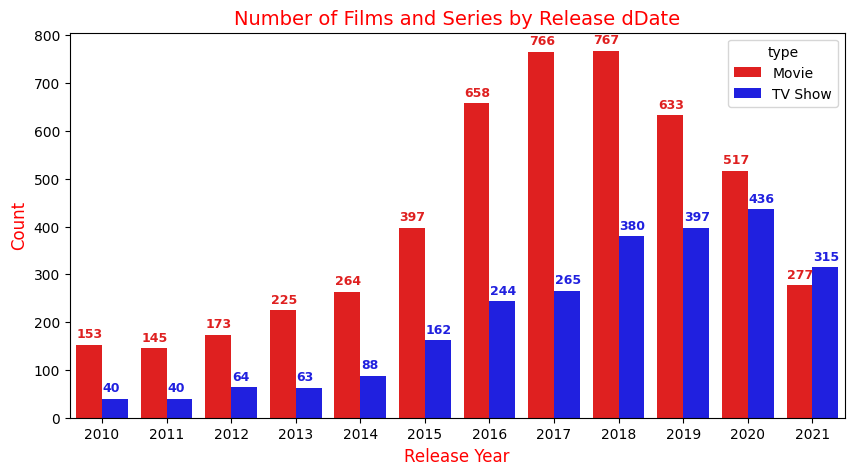

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "release_year", hue = "type", data = df[df.release_year >= 2010], palette=["red", "blue"])

plt.title('Number of Films and Series by Release dDate', color='red', fontsize=14)

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=9, color=bar_color, fontweight='bold')
plt.xlabel('Release Year', color='red', fontsize=12)
plt.ylabel('Count', color='red', fontsize=12)
plt.show()

## <font color='indianred'> <b>In Which Season Are Films and TV Shows Broadcast More?</b><font color='black'> 

In [36]:
df['season'] = df['month'].apply(lambda x: 
                                 "winter" if x in [12, 1, 2] else 
                                 "spring" if x in [3, 4, 5] else 
                                 "summer" if x in [6, 7, 8] else 
                                 "autumn")

df.season.value_counts()

season
summer    2309
autumn    2244
spring    2137
winter    2114
Name: count, dtype: int64

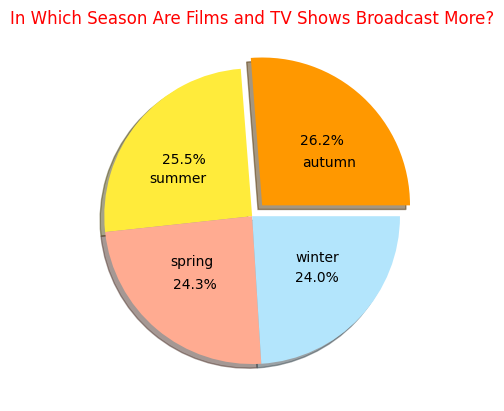

In [37]:
color_list = ["#FF9800", "#FFEB3B", "#FFAB91", "#B3E5FC"]

plt.pie(df.season.value_counts(), labels = df.season.unique(), pctdistance = 0.6, labeldistance = 0.4,
        autopct = '%1.1f%%', shadow = True, 
        colors = color_list, explode = [0.1, 0, 0, 0], textprops={'color': 'black'})

plt.title('In Which Season Are Films and TV Shows Broadcast More?', color= 'red')
    
plt.show()

## <font color='indianred'> <b>Top 5 Actors Who Starred in the Most Movies or TV Shows</b><font color='black'> 

In [38]:
top5_actors = df["cast"].str.split(", ", expand=True).stack().value_counts()[1:6]
top5_actors

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Name: count, dtype: int64

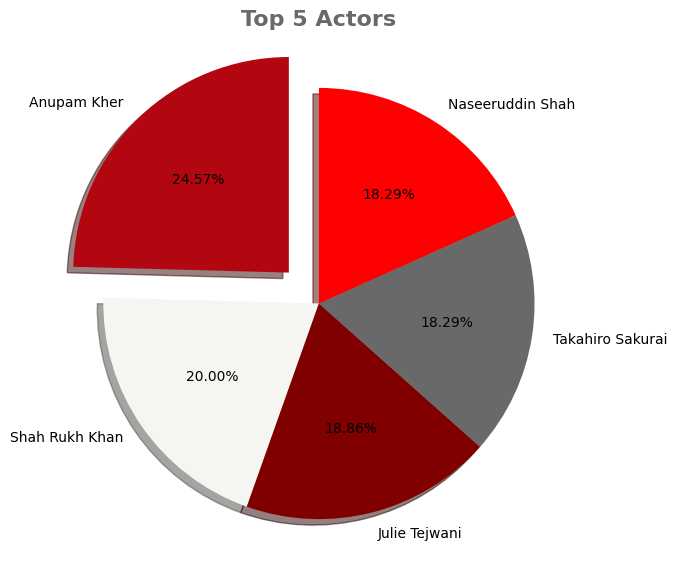

In [39]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(top5_actors.values, labels=top5_actors.index, autopct='%1.2f%%',
       startangle=90,
       shadow= 0.2,
       colors= ['#b20710', '#f5f5f1', "maroon", "dimgray", "red"],
       explode= (0.2, 0, 0, 0, 0),
       textprops={'color': 'black'}
      )

ax.set_title('Top 5 Actors', fontsize=16, fontweight='bold', color= 'dimgrey')

plt.show()

## <font color='indianred'> <b>Creating Word Cloud with Movies/TV Shows Titles</b><font color='black'> 

In [40]:
title_text = ' '.join(df[df.cast != "Unknown"].title)
title_text

'Blood & Water Ganglands Kota Factory Midnight Mass My Little Pony: A New Generation Sankofa The Great British Baking Show The Starling Bangkok Breaking Je Suis Karl Confessions of an Invisible Girl Dear White People Falsa identidad Intrusion Jaguar Resurrection: Ertugrul Avvai Shanmughi Go! Go! Cory Carson: Chrissy Takes the Wheel Jeans Love on the Spectrum Minsara Kanavu Grown Ups Dark Skies Paranoia Ankahi Kahaniya Chicago Party Aunt Sex Education Squid Game Tayo and Little Wizards The Father Who Moves Mountains The Stronghold Angry Birds Birth of the Dragon Chhota Bheem He-Man and the Masters of the Universe Jaws Jaws 2 Jaws 3 Jaws: The Revenge Safe House The Smart Money Woman Training Day Castle and Castle Dharmakshetra InuYasha the Movie 2: The Castle Beyond the Looking Glass InuYasha the Movie 3: Swords of an Honorable Ruler InuYasha the Movie 4: Fire on the Mystic Island InuYasha the Movie: Affections Touching Across Time Nailed It Naruto Shippuden the Movie: Blood Prison Narut

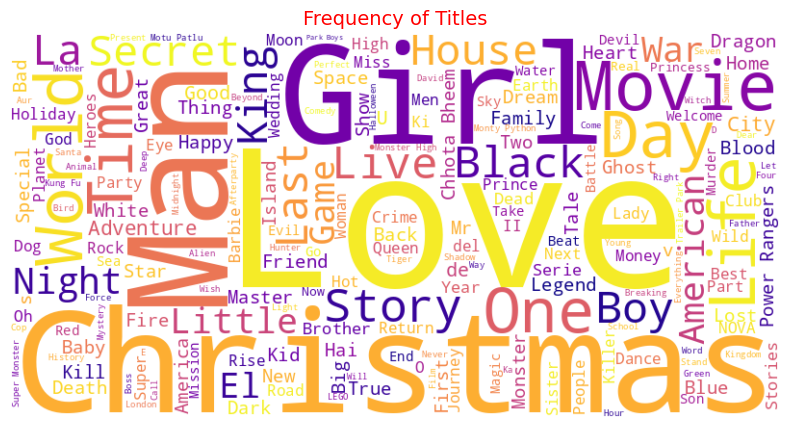

In [41]:
# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(title_text)

# Adjust the chart propertie
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of Titles', color='red', fontsize= 14)
plt.show()

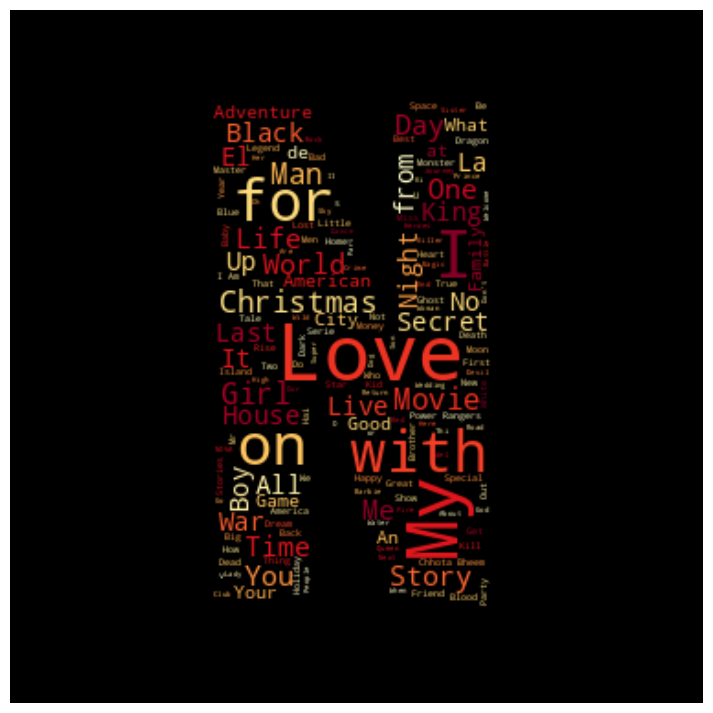

In [42]:
# Convert letter 'N' logo into a mask
netflix_mask = np.array(Image.open('/kaggle/input/netflix-titles-2021/N_logo.jpg').convert('L'))
netflix_mask = np.invert(netflix_mask)

# For excluding "a, the, and" etc. words from titles
custom_stopwords = {'a', 'the', 'and', 'in', 'of', 'to'}

# Identifying white areas on the mask
netflix_mask[netflix_mask > 128] = 255  # White areas
netflix_mask[netflix_mask <= 128] = 0 # Black areas

# Creating WordCloud
wc = WordCloud(background_color='black', mask=netflix_mask, contour_width=1, 
               contour_color='black', colormap='YlOrRd', stopwords=custom_stopwords.union({'Netflix'})).generate(title_text)

# Visualizing WordCloud
plt.figure(figsize=(9, 9))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

## <font color='indianred'> <b>Rating Distribution</b><font color='black'> 

In [43]:
df['rating'].value_counts().head(11)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Name: count, dtype: int64

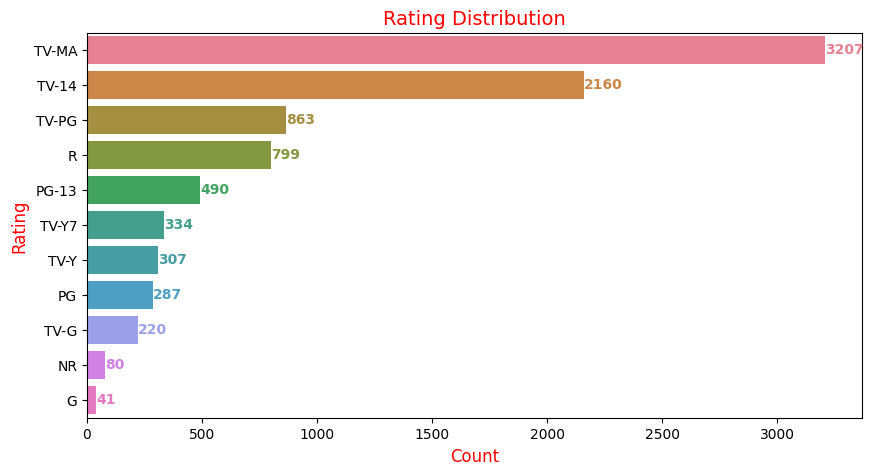

In [44]:
order = df['rating'].value_counts().head(11).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "rating", palette = "husl", order = order)

plt.title('Rating Distribution', color='red', fontsize=14)

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
plt.ylabel('Rating', color='red', fontsize=12)
plt.xlabel('Count', color='red', fontsize=12)
plt.show()

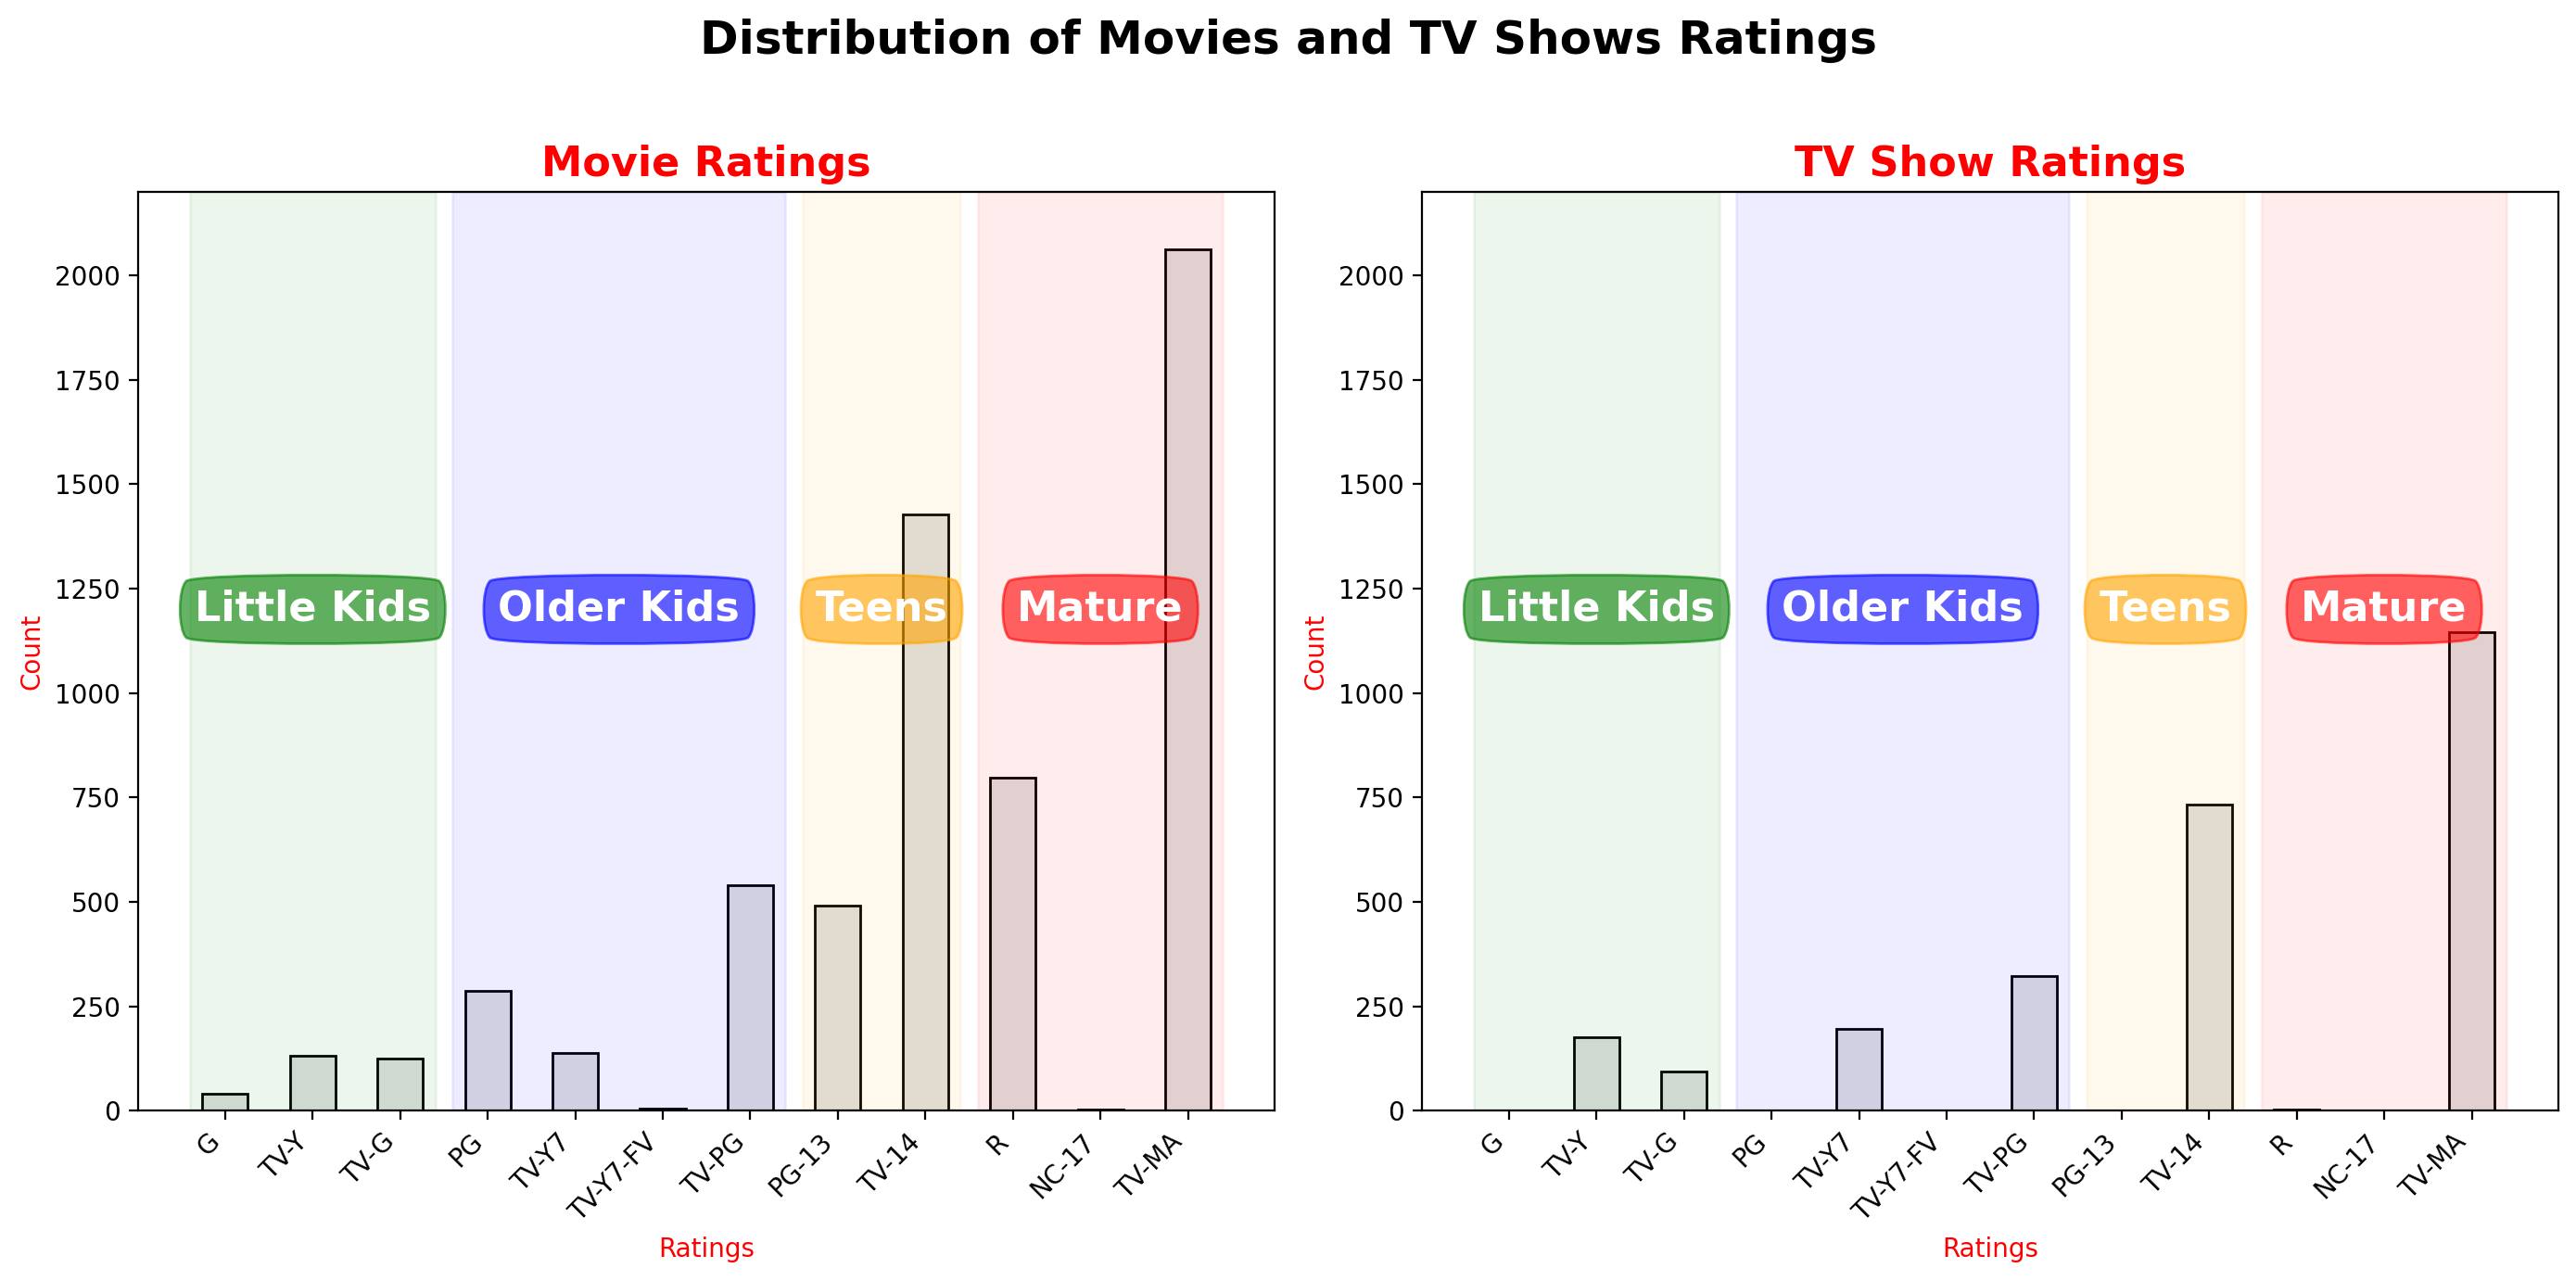

In [45]:
# Separate Movie and TV show datas
movie = df[df['type'] == 'Movie']
series = df[df['type'] == 'TV Show']

rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Count movie and TV show ratings
movie_rating = movie['rating'].value_counts()
tv_show_rating = series['rating'].value_counts()

# Re-index categories (assign value 0)
movie_rating = movie_rating.reindex(rating_order, fill_value=0)
tv_show_rating = tv_show_rating.reindex(rating_order, fill_value=0)

def rating_barplot(movie_data, tv_data, title, height, h_lim=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), dpi=200)

    # Movie bar graph
    if h_lim:
        ax1.set_ylim(0, h_lim)
    ax1.bar(movie_data.index, movie_data, color="#e0e0e0", width=0.52, edgecolor='black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 2], [3, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax1.annotate(sub_title,
                     xy=(sum(span_range[idx]) / 2, height),
                     xytext=(0, 0), textcoords='offset points',
                     va="center", ha="center",
                     color="w", fontsize=16, fontweight='bold',
                     bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax1.axvspan(span_range[idx][0] - 0.4, span_range[idx][1] + 0.4, color=color[idx], alpha=0.07)

    ax1.set_title(f'Movie Ratings', fontsize=16, fontweight='bold', color='red')
    ax1.set_xlabel('Ratings', color='red')
    ax1.set_ylabel('Count', color='red')

    # TV show bar chart
    if h_lim:
        ax2.set_ylim(0, h_lim)
    ax2.bar(tv_data.index, tv_data, color="#e0e0e0", width=0.52, edgecolor='black')

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax2.annotate(sub_title,
                     xy=(sum(span_range[idx]) / 2, height),
                     xytext=(0, 0), textcoords='offset points',
                     va="center", ha="center",
                     color="w", fontsize=16, fontweight='bold',
                     bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax2.axvspan(span_range[idx][0] - 0.4, span_range[idx][1] + 0.4, color=color[idx], alpha=0.07)

    ax2.set_title(f'TV Show Ratings', fontsize=16, fontweight='bold', color='red',)
    ax2.set_xlabel('Ratings', color='red')
    ax2.set_ylabel('Count', color='red')
    
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(f'Distribution of {title} Ratings', fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Set spacing for general title
    plt.show()

# Call the function
rating_barplot(movie_rating, tv_show_rating, 'Movies and TV Shows', 1200, 2200)

## <font color='indianred'> <b>Distribution of Movies and TV Shows by Countries</b><font color='black'> 

### <font color='firebrick'> <b>By Using Folium</b><font color='black'> 

In [46]:
mapList = pd.read_csv("https://raw.githubusercontent.com/brian-cuny/migrantdata/master/country_locations.csv")
mapList.head(5)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [47]:
type_counts = df[df.country != "Unknown"].groupby(['country', 'type']).size().unstack(fill_value=0).reset_index().sort_values("Movie", ascending=False).head(10)
type_counts

type,country,Movie,TV Show
603,United States,2055,760
251,India,893,79
506,United Kingdom,206,213
58,Canada,122,59
444,Spain,97,48
150,Egypt,92,14
368,Nigeria,86,9
272,Indonesia,77,2
319,Japan,76,169
492,Turkey,76,29


In [48]:
country_coords = mapList[mapList['name'].isin(type_counts.loc[:,"country"])]
country_coords = country_coords[['name', 'latitude', 'longitude']]
country_coords

,name,latitude,longitude
35,Canada,56.130366,-106.346771
61,Egypt,26.820553,30.802498
64,Spain,40.463667,-3.749220
73,United Kingdom,55.378051,-3.435973
98,Indonesia,-0.789275,113.921327
102,India,20.593684,78.962880
111,Japan,36.204824,138.252924
160,Nigeria,9.081999,8.675277
219,Turkey,38.963745,35.243322
227,United States,37.090240,-95.712891


In [49]:
# create a map
m = folium.Map(location=[20,0], zoom_start=2)

# Add the type counts to the coordinates by country.
for _, row in country_coords.iterrows():
    country = row['name']
    latitude = row['latitude']
    longitude = row['longitude']
    
    # Obtain type counts by country
    type_counts_row = type_counts[type_counts['country'] == country]
    movie_count = type_counts_row['Movie'].values[0] if 'Movie' in type_counts_row.columns else 0
    tv_shows_count = type_counts_row['TV Show'].values[0] if 'TV Show' in type_counts_row.columns else 0
    
    # Popup message
    popup_message = f"Country: {str(type_counts_row['country'].values).upper()[2:-2]}, Movies: {movie_count}, TV Shows: {tv_shows_count}"

    
    # Add marker
    folium.Marker(
        location=[latitude, longitude],
        popup=popup_message,
        icon=folium.Icon(color='blue' if movie_count > tv_shows_count else 'hotpink')
    ).add_to(m)

# Display map
m.save('map.html')
m

In [50]:
country_distribution = df['country'].str.split(', ', expand=True).stack().value_counts()

# Filtering: Only countries with more than a certain number of movies
country_distribution = country_distribution[country_distribution > 10]

country_distribution.reset_index()

,index,count
0,United States,3686
1,India,1046
2,Unknown,831
3,United Kingdom,804
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,South Korea,231
9,Germany,226


In [51]:
# Defining country data
country_data = country_distribution.reset_index()
country_data.columns = ['country', 'count']

# Creating the Choropleth map
fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.diverging.Temps,
    title='Distribution of Movies and TV Shows by Country'
)

# Update title, color and dimensions
fig.update_layout(
    title=dict(text='Distribution of Movies and TV Shows by Country', font=dict(color='red')),
    title_x=0.5,  # To center the title
    width=900,
    height=600
)

# Showing map
fig.show()

## <font color='indianred'> <b>Top 10 Categories</b><font color='black'> 

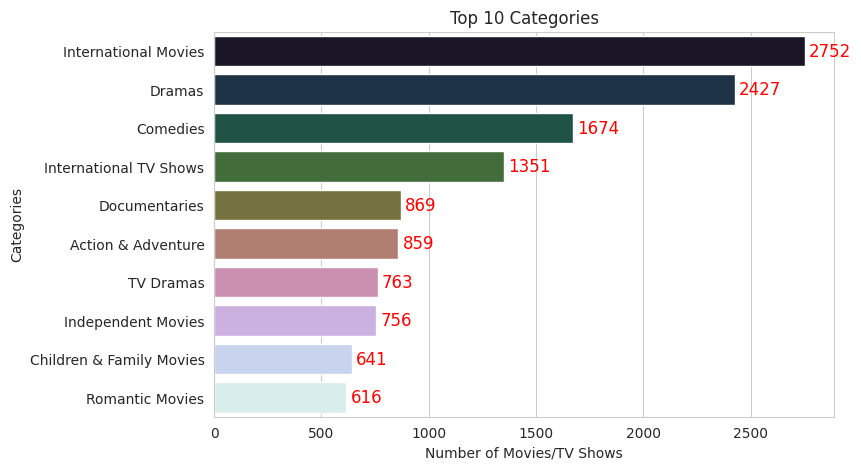

In [52]:
top_categories = df['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()[:10]
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette="cubehelix")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='red', padding=3)

ax.set(xlabel='Number of Movies/TV Shows', ylabel='Categories')
plt.title("Top 10 Categories")

plt.show()

## <font color='indianred'> <b>Top 10 Directors' Genre Choice Distribution</b><font color='black'> 

In [53]:
data = df.copy()
data = data.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
data['listed_in'] = data['listed_in'].str.strip()
director_counts = data['director'].value_counts()
top_20_directors = director_counts[1:11].index
df_top_20 = data[data['director'].isin(top_20_directors)]
grouped_data = df_top_20.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

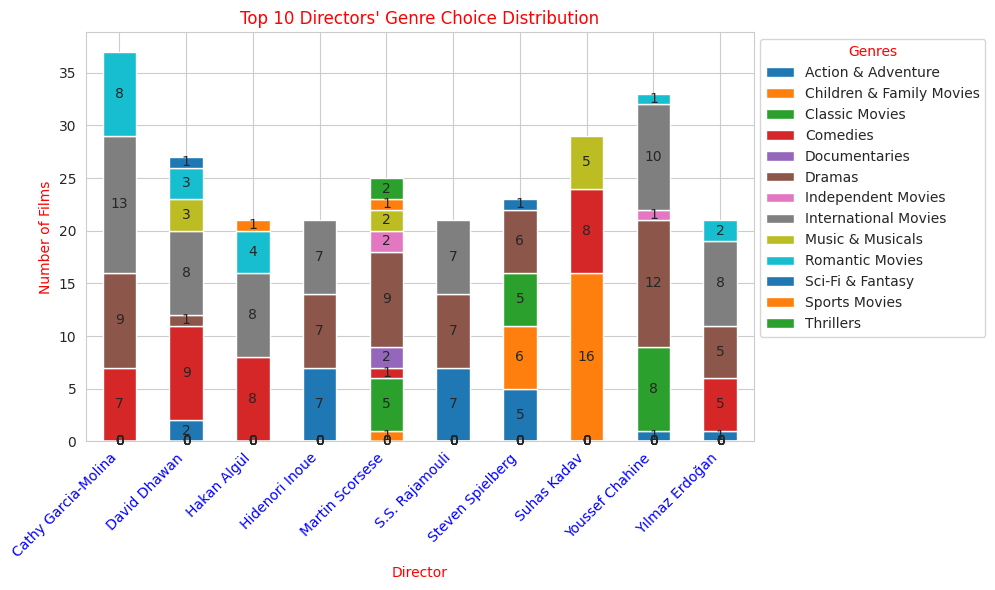

In [54]:
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.title('Top 10 Directors\' Genre Choice Distribution', color='red')
plt.xlabel('Director', color='red')
plt.ylabel('Number of Films', color='red')
plt.xticks(rotation=45, ha='right', color='blue')

legend = plt.legend(title='Genres', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_color('red')

plt.tight_layout()
plt.show()

**This project helps us better understand the Netflix platform's content strategies, user trends and distribution of content by genre.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>